# Q2. Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

 - Variable Name -  Variable Description 
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No;1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
 - Name	- Name
 - Sex - Sex
 - Age - Age
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin 
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

## Import Libraries
Import all necessary libraries


In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay

import numpy as np

Our target variable will be Survived.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [43]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

2. The resulting dataframe (I.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [44]:
df_train.shape

(712, 12)

3. In df_train, dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [45]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

4. Use the ‘pandas.isnull().sum()’ function check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [46]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

5. Use the ‘pandas.DataFrame.drop()’ function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [47]:
df_train = pd.DataFrame.drop(df_train, columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'])

6. Use the ‘pandas.DataFrame.fillna()’ function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called `imputation` (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the ‘dropna()’ function to drop any remaining rows that consist of NA values.

In [48]:
pd.DataFrame.fillna(df_train['Age'], df_train['Age'].mean(), inplace = True)
df_train = df_train.dropna()

7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [49]:
X_train = df_train.drop('Survived', axis = 1)
y_train = df_train['Survived']

X_test = df_test.drop('Survived', axis = 1)
y_test = df_test['Survived']


#### ii. Data Visualization

1. Using matplotlib employ a scatter plot using ‘matplotlib.pyplot.scatter’ between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title.

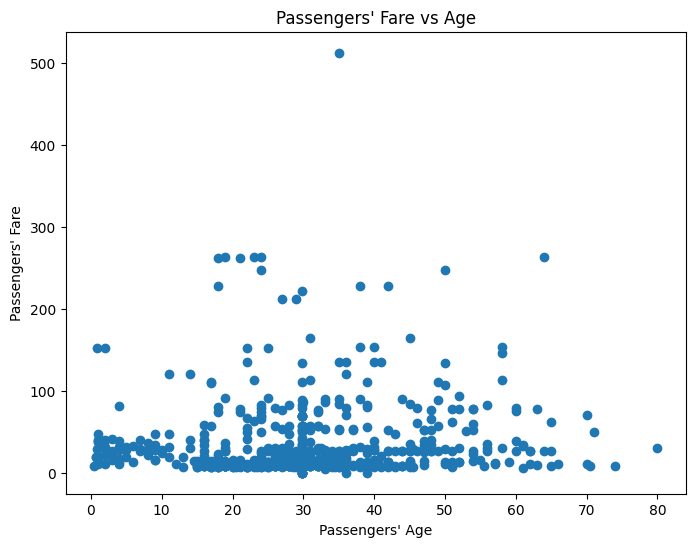

In [50]:
plt.figure(figsize = (8, 6))
plt.title('Passengers\' Fare vs Age')
plt.scatter(df_train['Age'], df_train['Fare'])
plt.xlabel('Passengers\' Age')
plt.ylabel('Passengers\' Fare')
plt.show()

2. **Only for this question** use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using ‘matplotlib.pyplot.bar’ (Passenger Class column). 

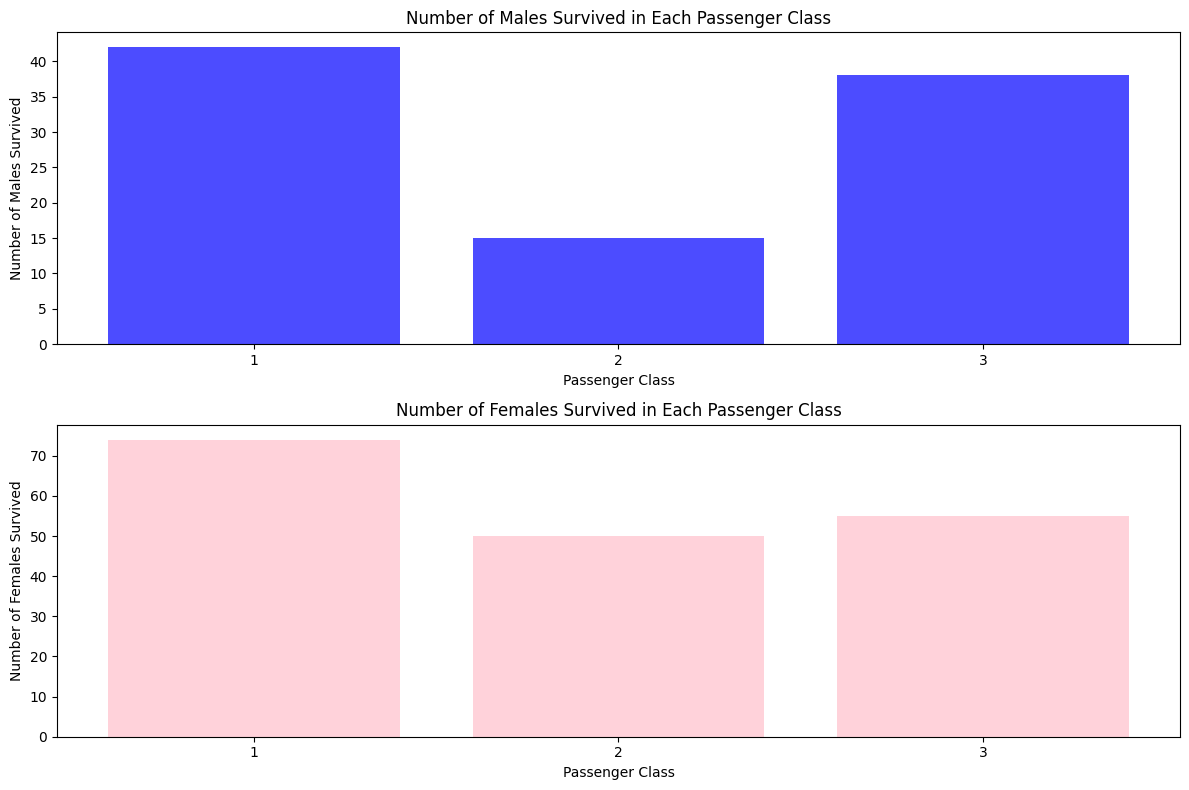

In [51]:
# Filter survived passengers
survived_passengers = df_train[df_train['Survived'] == 1]

# Plot the number of males and females in each passenger class
plt.figure(figsize=(12, 8))

# Plot for Males
plt.subplot(2, 1, 1)
survived_males = survived_passengers[survived_passengers['Sex'] == 'male']
male_counts = survived_males['Pclass'].value_counts().sort_index()
plt.bar(male_counts.index, male_counts.values, color='blue', alpha=0.7)
plt.title('Number of Males Survived in Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Males Survived')
plt.xticks(male_counts.index)

# Plot for Females
plt.subplot(2, 1, 2)
survived_females = survived_passengers[survived_passengers['Sex'] == 'female']
female_counts = survived_females['Pclass'].value_counts().sort_index()
plt.bar(female_counts.index, female_counts.values, color='pink', alpha=0.7)
plt.title('Number of Females Survived in Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Females Survived')
plt.xticks(female_counts.index)

plt.tight_layout()
plt.show()


3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column. 

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train store the result back into X_train). 

In [52]:
X_train = pd.get_dummies(X_train, columns = ['Sex', 'Embarked'], drop_first = True)

#### iii. Data Scaling

1. Employ X_train and MinMaxScaler only on the continuous attributes. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in X_train again. 

In [53]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [54]:
X_test = scaler.transform(X_test)

### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [55]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [56]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [57]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [58]:
accuracy_score(y_pred_lr, y_test)

0.888268156424581

#### ii. Modelling (Model Instantiation / Training) using Support Vector Machine Classifier

1. Employ the Support Vector Machine (SVM) classifier from sklearn () and instantiate the model. Make sure to set `probability=True` when creating the model. Label this model as ‘model_svm’

In [59]:
model_svm = SVC(probability = True)

2. Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [60]:
model_svm.fit(X_train, y_train)

SVC(probability=True)

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [61]:
y_pred_svm = model_svm.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [62]:
accuracy_score(y_pred_svm, y_test)

0.8659217877094972

#### iii. Modelling Logistic Regression Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_40`, `df_train_60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20` we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable.

**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise level datasets.**  
Train a new Logistic Regression model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_lr_noise_<nl>`. Specifically, do the following:
1. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as `model_lr_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data.
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr_noise<nl>`.
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

In [63]:
# Load the data and split
df_train_noise20 = pd.read_csv('df_train_noise20.csv')
df_train_noise40 = pd.read_csv('df_train_noise40.csv')
df_train_noise60 = pd.read_csv('df_train_noise60.csv')

X_train_20 = df_train_noise20.drop('Survived', axis = 1)
y_train_20 = df_train_noise20['Survived']

X_train_40 = df_train_noise40.drop('Survived', axis = 1)
y_train_40 = df_train_noise40['Survived']

X_train_60 = df_train_noise60.drop('Survived', axis = 1)
y_train_60 = df_train_noise60['Survived']

# Initialize the models
model_lr_noise20 = LogisticRegression()
model_lr_noise40 = LogisticRegression()
model_lr_noise60 = LogisticRegression()

# Fit data into the models
model_lr_noise20.fit(X_train_20, y_train_20)
model_lr_noise40.fit(X_train_40, y_train_40)
model_lr_noise60.fit(X_train_60, y_train_60)

# Obtain predictions
y_pred_lr_noise20 = model_lr_noise20.predict(X_test)
y_pred_lr_noise40 = model_lr_noise40.predict(X_test)
y_pred_lr_noise60 = model_lr_noise60.predict(X_test)

# Get the accuracy scores
print(f"Accuracy score for 20% noise: {accuracy_score(y_pred_lr_noise20, y_test)}")
print(f"Accuracy score for 40% noise: {accuracy_score(y_pred_lr_noise40, y_test)}")
print(f"Accuracy score for 60% noise: {accuracy_score(y_pred_lr_noise60, y_test)}")

# 

Accuracy score for 20% noise: 0.8435754189944135
Accuracy score for 40% noise: 0.7653631284916201
Accuracy score for 60% noise: 0.6089385474860335


c:\Users\MadScientist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\MadScientist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\MadScientist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### iv. Modelling Support Vector Machine (SVM) Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_40`, `df_train_60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).  

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20`’ we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable. 
     
**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise datasets.**
Train a new SVM classification model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_svm_noise_<nl>`.  Specifically, do the following:
1. Employ a new SVM classifier from sklearn and instantiate the model. Label this model as `model_svm_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data. 
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_svm_noise<nl>`.  
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model. 

In [64]:
# Initialize the models
model_svm_noise20 = SVC()
model_svm_noise40 = SVC()
model_svm_noise60 = SVC()

# Fit data into the models
model_svm_noise20.fit(X_train_20, y_train_20)
model_svm_noise40.fit(X_train_40, y_train_40)
model_svm_noise60.fit(X_train_60, y_train_60)

# Obtain predictions
y_pred_svm_noise20 = model_svm_noise20.predict(X_test)
y_pred_svm_noise40 = model_svm_noise40.predict(X_test)
y_pred_svm_noise60 = model_svm_noise60.predict(X_test)

# Get the accuracy scores
print(f"Accuracy score for 20% noise: {accuracy_score(y_pred_svm_noise20, y_test)}")
print(f"Accuracy score for 40% noise: {accuracy_score(y_pred_svm_noise40, y_test)}")
print(f"Accuracy score for 60% noise: {accuracy_score(y_pred_svm_noise60, y_test)}")

Accuracy score for 20% noise: 0.8324022346368715
Accuracy score for 40% noise: 0.8547486033519553
Accuracy score for 60% noise: 0.6312849162011173


c:\Users\MadScientist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\MadScientist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\MadScientist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the `model_lr` model and the `model_svm` along with a confusion matrix for each of them. 

In [65]:
print("Classification Report for Logistic Regression: ")
print(classification_report(y_test, y_pred_lr))

print("Classification Report for SVM: ")
print(classification_report(y_test, y_pred_svm))

print("------------------------------------------------------")

print("Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, y_pred_lr))

print("Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, y_pred_svm))

Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       113
           1       0.87      0.82      0.84        66

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179

Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       113
           1       0.96      0.67      0.79        66

    accuracy                           0.87       179
   macro avg       0.90      0.82      0.84       179
weighted avg       0.88      0.87      0.86       179

------------------------------------------------------
Confusion Matrix for Logistic Regression: 
[[105   8]
 [ 12  54]]
Confusion Matrix for SVM: 
[[111   2]
 [ 22  44]]


#### ii. Report the accuracy and classification report for each of the three noisy models (`model_lr_noise<nl>`, `model_svm_noise<nl>`). 

In [66]:
print("Classification Report for Logistic Regression with Noise 20: ")
print(classification_report(y_test, y_pred_lr_noise20))
print(f"Accuracy Score for Logistic Regression with Noise 20: {accuracy_score(y_pred_lr_noise20, y_test)}")
print()

print("Classification Report for SVM with Noise 20: ")
print(classification_report(y_test, y_pred_svm_noise20))
print(f"Accuracy Score for SVM with Noise 20: {accuracy_score(y_pred_svm_noise20, y_test)}")
print()


print("------------------------------------------------------")

print("Classification Report for Logistic Regression with Noise 40: ")
print(classification_report(y_test, y_pred_lr_noise40))
print(f"Accuracy Score for Logistic Regression with Noise 40: {accuracy_score(y_pred_lr_noise40, y_test)}")
print()


print("Classification Report for SVM with Noise 40: ")
print(classification_report(y_test, y_pred_svm_noise40))
print(f"Accuracy Score for SVM with Noise 40: {accuracy_score(y_pred_svm_noise40, y_test)}")
print()

print("------------------------------------------------------")

print("Classification Report for Logistic Regression with Noise 60: ")
print(classification_report(y_test, y_pred_lr_noise60))
print(f"Accuracy Score for Logistic Regression with Noise 60: {accuracy_score(y_pred_lr_noise60, y_test)}")
print()

print("Classification Report for SVM with Noise 60: ")
print(classification_report(y_test, y_pred_svm_noise60))
print(f"Accuracy Score for SVM with Noise 60: {accuracy_score(y_pred_svm_noise60, y_test)}")


Classification Report for Logistic Regression with Noise 20: 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.84      0.71      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

Accuracy Score for Logistic Regression with Noise 20: 0.8435754189944135

Classification Report for SVM with Noise 20: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       113
           1       1.00      0.55      0.71        66

    accuracy                           0.83       179
   macro avg       0.90      0.77      0.79       179
weighted avg       0.87      0.83      0.82       179

Accuracy Score for SVM with Noise 20: 0.8324022346368715

------------------------------------------------------
Classification Report for Logistic Regression with 

#### iii. Make a calibration plot for each of the models without noisy data (`model_lr`, `model_svm`).

Use the CalibrationDisplay class from sklearn.calibration to make your plot.

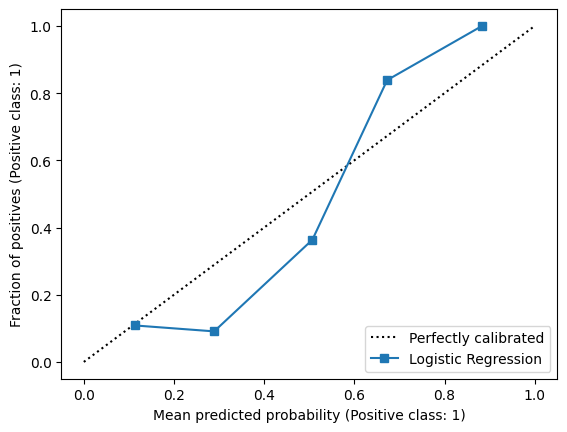

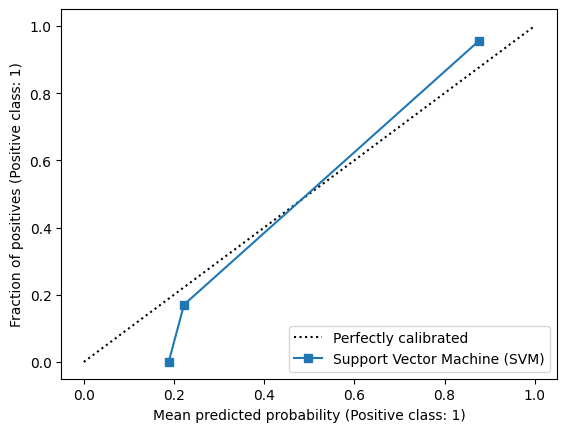

In [67]:
# Create CalibrationDisplay for Logistic Regression
CalibrationDisplay.from_estimator(model_lr, X_test, y_test, name='Logistic Regression')

# Create CalibrationDisplay for Support Vector Machine (SVM)
CalibrationDisplay.from_estimator(model_svm, X_test, y_test, name='Support Vector Machine (SVM)')
